### Simple Display of Neuron Time Series Data

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pyBrainNetSim.models.world as world
import pyBrainNetSim.models.network as network
import pyBrainNetSim.simulation.simnetwork as sim
import pyBrainNetSim.generators.random as rnd
import pyBrainNetSim.drawing.viewers as vis
mpl.rcParams['figure.figsize'] = (15, 6)

[ 0.89795918  0.97959184  0.95918367  0.97959184]
[ 0.07142857  0.06122449  0.04081633  0.05102041  0.06122449  0.09183673
  0.          0.02040816  0.03061224  0.06122449  0.03061224  0.08163265
  0.03061224  0.05102041  0.01020408  0.01020408  0.04081633  0.04081633
  0.06122449  0.01020408  0.06122449  0.03061224  0.03061224  0.05102041
  0.03061224  0.05102041  0.07142857  0.02040816]
[ 0.95918367  0.91836735  0.94897959  1.        ]


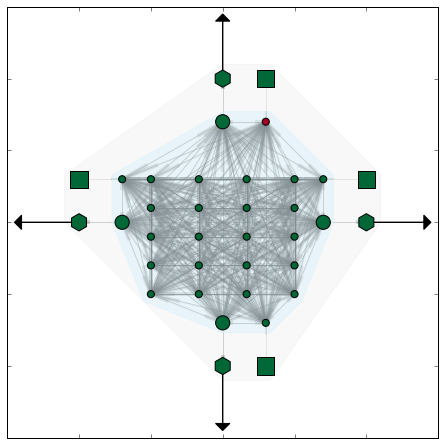

In [3]:
internal_props = {'number_neurons': 28, 'excitatory_to_inhibitory':0.00,
                  'spontaneity': 0.00, 'inactive_period': 0., 'threshold': 1.}
ipd = rnd.InternalPropertyDistribution(**internal_props)
sensor_props = {'threshold': 5.}
weight_props = {'int_to_int': 1., 'int_to_motor': 1., 'sensor_to_int': 0.5,
                'int_to_motor_max_connections': 1, 'sensory_to_internal_max_connections': 1,
                'edge_motor_min_cutoff': .2, 'edge_sensor_min_cutoff': .2}

sm_prop_dist = rnd.SensorMoverPropertyDistribution(internal=ipd, sensors=rnd.SensoryPropertyDistribution(**sensor_props),
                                                   weights=rnd.WeightPropertyDistribution(**weight_props))
my_network = sim.HebbianNetworkBasic(sm_prop_dist.create_digraph(), pos_synapse_growth=0.0, neg_synapse_growth=-0.00)
my_network.simulate(max_iter=10)
axs = my_network.draw_networkx(t=2)

In [3]:
#_axs1 = vis.plot_node_property_ts(my_network.simdata, kind='vlines', prop='value',
#                                  neuron_ids=sorted(my_network.simdata[-1].nodes('Motor')))

In [4]:
#_axs2 = vis.plot_node_property_ts(my_network.simdata, kind='vlines', prop='value',
#                                  neuron_ids=sorted(my_network.simdata[-1].nodes('Sensory')))

In [5]:
#_axs2 = vis.plot_node_property_ts(my_network.simdata, prop='value', neuron_ids=sorted(my_network.simdata[-1].nodes('Internal')))
#_axs2 = vis.plot_node_property_ts(my_network.simdata, kind='line', prop='energy_value', neuron_ids='I4')

In [6]:
#f, axarr = plt.subplots(1,3)
#_ax = vis.pcolormesh_edges(my_network, at_time=0, ax=axarr[0])
#_ax = vis.pcolormesh_edges(my_network, at_time=-1, ax=axarr[1])
#_ax = vis.pcolormesh_edge_changes(my_network, initial_time=0, final_time=-1, as_pct=False, ax=axarr[2])

In [7]:
pd.DataFrame(my_network.simdata.neuron_ts(neuron_id='I0', prop=['node_type','threshold','value','postsyn_signal','signal']))

,node_type,postsyn_signal,signal,threshold,value
0,I,0.0,None,1.0,0.0
1,I,0.0,None,1.0,0.0
2,I,0.0,None,1.0,0.0
3,I,0.0,None,1.0,0.0
4,I,0.0,None,1.0,0.0
5,I,0.0,None,1.0,0.0
6,I,0.0,None,1.0,0.0
7,I,0.0,None,1.0,0.0
8,I,0.0,None,1.0,0.0
9,I,0.0,None,1.0,0.0


In [8]:
pd.DataFrame(my_network.simdata.neuron_ts(neuron_id=my_network.simdata[-1].nodes('Internal'), prop='node_type'))

,I0,I1,I10,I11,I2,I3,I4,I5,I6,I7,I8,I9
0,I,I,I,I,I,I,I,I,I,I,I,I
1,I,I,I,I,I,I,I,I,I,I,I,I
2,I,I,I,I,I,I,I,I,I,I,I,I
3,I,I,I,I,I,I,I,I,I,I,I,I
4,I,I,I,I,I,I,I,I,I,I,I,I
5,I,I,I,I,I,I,I,I,I,I,I,I
6,I,I,I,I,I,I,I,I,I,I,I,I
7,I,I,I,I,I,I,I,I,I,I,I,I
8,I,I,I,I,I,I,I,I,I,I,I,I
9,I,I,I,I,I,I,I,I,I,I,I,I
